In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels
import numpy as np
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

In [13]:
df = pd.read_csv("full_data.csv", encoding="latin")
df

,Unnamed: 0,ward,borough,%_english_is_first_language_of_no_one_in_household_2011,median_house_price_2014,median_household_income_estimate_2012_13,male_life_expectancy_2009_13,female_life_expectancy_2009_13,%_area_that_is_open_space_2014,%_travel_by_bicycle_to_work_2011,turnout_at_mayoral_election_2012,crime_rate_2014_15,%_bame_2011,%_all_older_people_aged_65_2015,%_homes_with_good_access_to_nature,%_homes_with_deficiency_in_access_to_nature,female_life_expectancy_normalised,male_life_expectancy_normalised,median_household_income_estimate_2012_13_log,median_household_income_estimate_2012_13_pow
0,1,E05000026,Barking and Dagenham,25.7,173000.0,33920.0,80.2,83.9,21.9,0.8,25.7,138.1,71.9,5.0,98.0,2.0,0.996498,1.005313,10.431760,0.000029
1,2,E05000027,Barking and Dagenham,7.9,215000.0,32470.0,77.2,80.6,20.6,1.0,20.3,73.6,29.9,10.0,28.0,72.0,0.957303,0.967708,10.388072,0.000031
2,3,E05000028,Barking and Dagenham,10.5,210000.0,33000.0,79.0,79.3,1.9,1.6,22.5,79.9,41.2,8.7,83.0,17.0,0.941863,0.990271,10.404263,0.000030
3,4,E05000029,Barking and Dagenham,6.5,240500.0,33920.0,79.2,82.2,56.0,1.2,25.3,76.1,37.9,14.2,36.0,64.0,0.976306,0.992778,10.431760,0.000029
4,5,E05000030,Barking and Dagenham,4.5,240000.0,37400.0,77.1,81.1,50.4,1.6,24.1,66.7,24.8,14.2,100.0,0.0,0.963242,0.966455,10.529426,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,620,E05000645,Westminster,15.1,715650.0,47340.0,83.3,84.3,32.4,5.9,40.2,57.7,21.8,14.9,0.0,100.0,1.001249,1.044172,10.765111,0.000021
620,621,E05000646,Westminster,17.0,840000.0,46550.0,80.0,85.1,26.4,4.3,37.8,82.4,29.3,12.6,59.0,41.0,1.010750,1.002806,10.748282,0.000021
621,622,E05000647,Westminster,15.9,857250.0,50250.0,80.7,88.5,4.0,5.9,36.8,138.1,24.0,12.1,69.0,31.0,1.051133,1.011581,10.824766,0.000020
622,623,E05000648,Westminster,24.1,499975.0,32390.0,75.1,81.6,19.2,5.1,29.6,75.5,52.8,9.0,87.0,13.0,0.969180,0.941384,10.385605,0.000031


In [48]:
# filter out E05000637 (westminister with income outlier at 88330.0)
df_no_outlier = df.drop(df[df['ward'] == 'E05000637'].index)

**Summary statistics of %_not_bame_2011 which will be 100-%_bame_2011**

In [16]:
size = len(df)
#%_not_bame_2011
df['%_not_bame_2011'] = 100 - df['%_bame_2011']

# middles
mean = df['%_not_bame_2011'].mean() 
mode = df['%_not_bame_2011'].mode()
median = df['%_not_bame_2011'].median()

# spread
min_not_bame = df['%_not_bame_2011'].min()
max_not_bame = df['%_not_bame_2011'].max()
range_not_bame = max_not_bame - min_not_bame
var = df['%_not_bame_2011'].var()
std_dev = df['%_not_bame_2011'].std()

print("size of data set: ", size)
print("mean: ", mean)
print("median: ", median)
print("min percentage of non-bame: ", min_not_bame)
print("max percentage of non-bame: ", max_not_bame)
print("range of percentage of non-bame: ", range_not_bame)
print("variance: ", var)
print("standard deviation: ", std_dev)

size of data set:  624
mean:  61.23108974358971
median:  63.9
min percentage of non-bame:  6.299999999999997
max percentage of non-bame:  95.9
range of percentage of non-bame:  89.60000000000001
variance:  358.1143769806974
standard deviation:  18.923910192682097


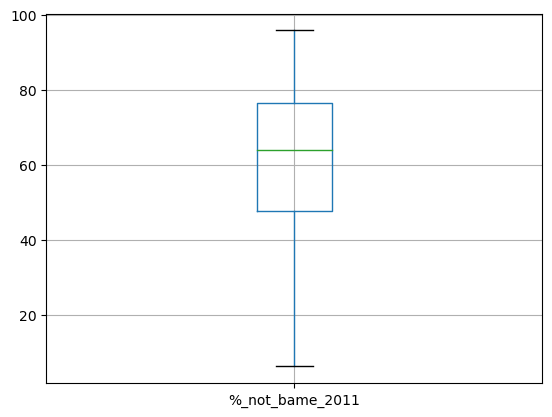

In [20]:
# boxplot
df.boxplot(column='%_not_bame_2011')
plt.savefig('output/boxplot_nonbame.png', dpi=300, transparent=True)

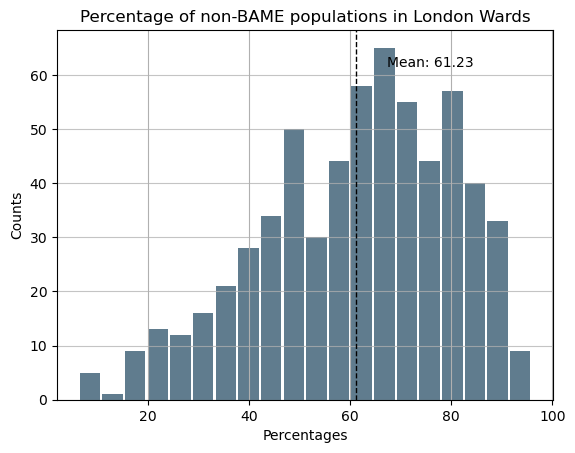

In [18]:
# histogram
df['%_not_bame_2011'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Percentage of non-BAME populations in London Wards')
plt.xlabel('Percentages')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(mean))
plt.savefig('output/histogram_nonbame.png', dpi=300, transparent=True)

### No outlier summary -- no difference

**Exploratory plots of voter turnout at 2012 mayoral elections against income, age, and % not BAME**

In [6]:
# # visualise with scatterplots
# fig, axs = plt.subplots(1, 3, sharey=True)
# df.plot(kind='scatter', x='median_household_income_estimate_2012_13', y='turnout_at_mayoral_election_2012', ax=axs[0], figsize=(16, 8))
# df.plot(kind='scatter', x='%_all_older_people_aged_65_2015', y='turnout_at_mayoral_election_2012', ax=axs[1])
# df.plot(kind='scatter', x='%_not_bame_2011', y='turnout_at_mayoral_election_2012', ax=axs[2])

In [7]:
# visualize the relationship between the features and the response using scatterplots
# import math
# df['ln_mhie_2013'] = df['median_household_income_estimate_2012_13'].transform(lambda x: math.log(x))
# fig, axs = plt.subplots(1, 3, sharey=True)
# df.plot(kind='scatter', x='ln_mhie_2013', y='turnout_at_mayoral_election_2012', ax=axs[0], figsize=(16, 8))
# df.plot(kind='scatter', x='%_all_older_people_aged_65_2015', y='turnout_at_mayoral_election_2012', ax=axs[1])
# df.plot(kind='scatter', x='%_not_bame_2011', y='turnout_at_mayoral_election_2012', ax=axs[2])
# plt.savefig('output/scatterplot_multivar.png', dpi=300, transparent=True)

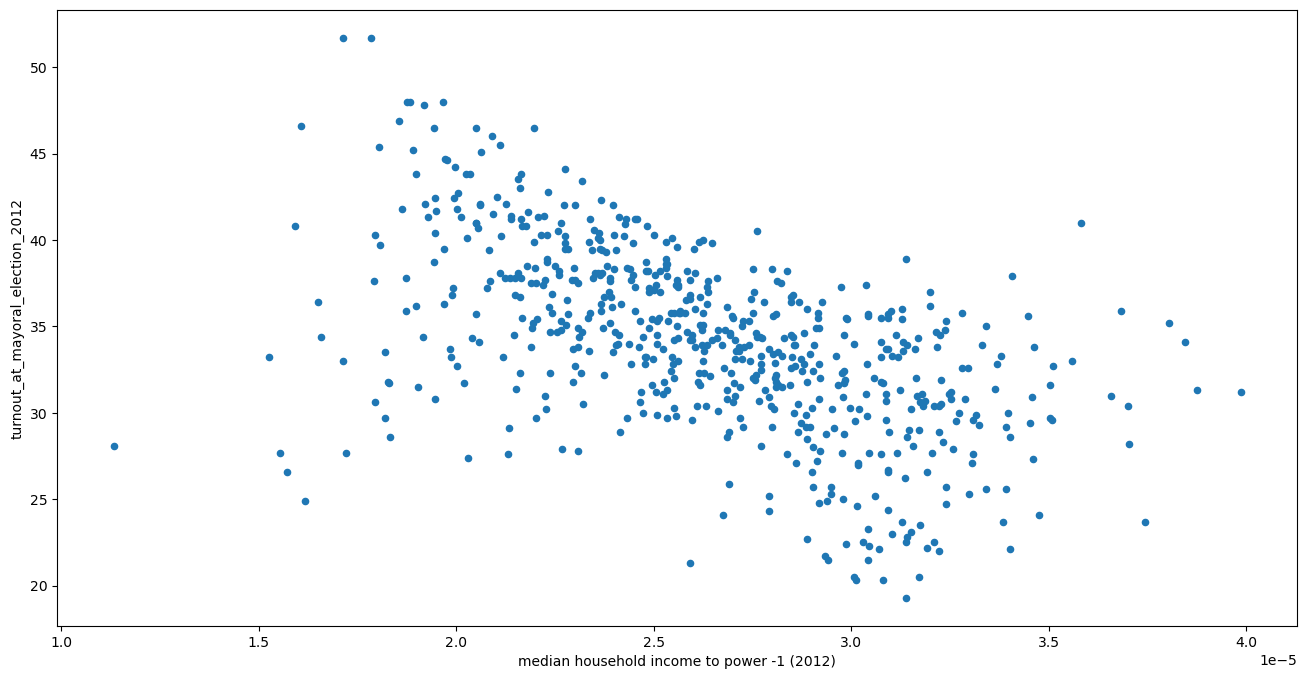

In [6]:
#fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='median_household_income_estimate_2012_13_pow', y='turnout_at_mayoral_election_2012',
        xlabel = 'median household income to power -1 (2012)', figsize=(16, 8))
# df.plot(kind='scatter', x='%_all_older_people_aged_65_2015', y='turnout_at_mayoral_election_2012', ax=axs[1])
# df.plot(kind='scatter', x='%_not_bame_2011', y='turnout_at_mayoral_election_2012', ax=axs[2])
plt.savefig('output/scatterplot_power-1.png', dpi=300, transparent=True)

**Correlation matrix for all 3 variables (LOG INCOME)** 

In [23]:
df_corr = df[['turnout_at_mayoral_election_2012','median_household_income_estimate_2012_13_log','%_all_older_people_aged_65_2015', '%_not_bame_2011']]

In [24]:
df_corr.corr()

,turnout_at_mayoral_election_2012,median_household_income_estimate_2012_13_log,%_all_older_people_aged_65_2015,%_not_bame_2011
turnout_at_mayoral_election_2012,1.000000,0.541504,0.327602,0.320853
median_household_income_estimate_2012_13_log,0.541504,1.000000,0.359382,0.616896
%_all_older_people_aged_65_2015,0.327602,0.359382,1.000000,0.561248
%_not_bame_2011,0.320853,0.616896,0.561248,1.000000


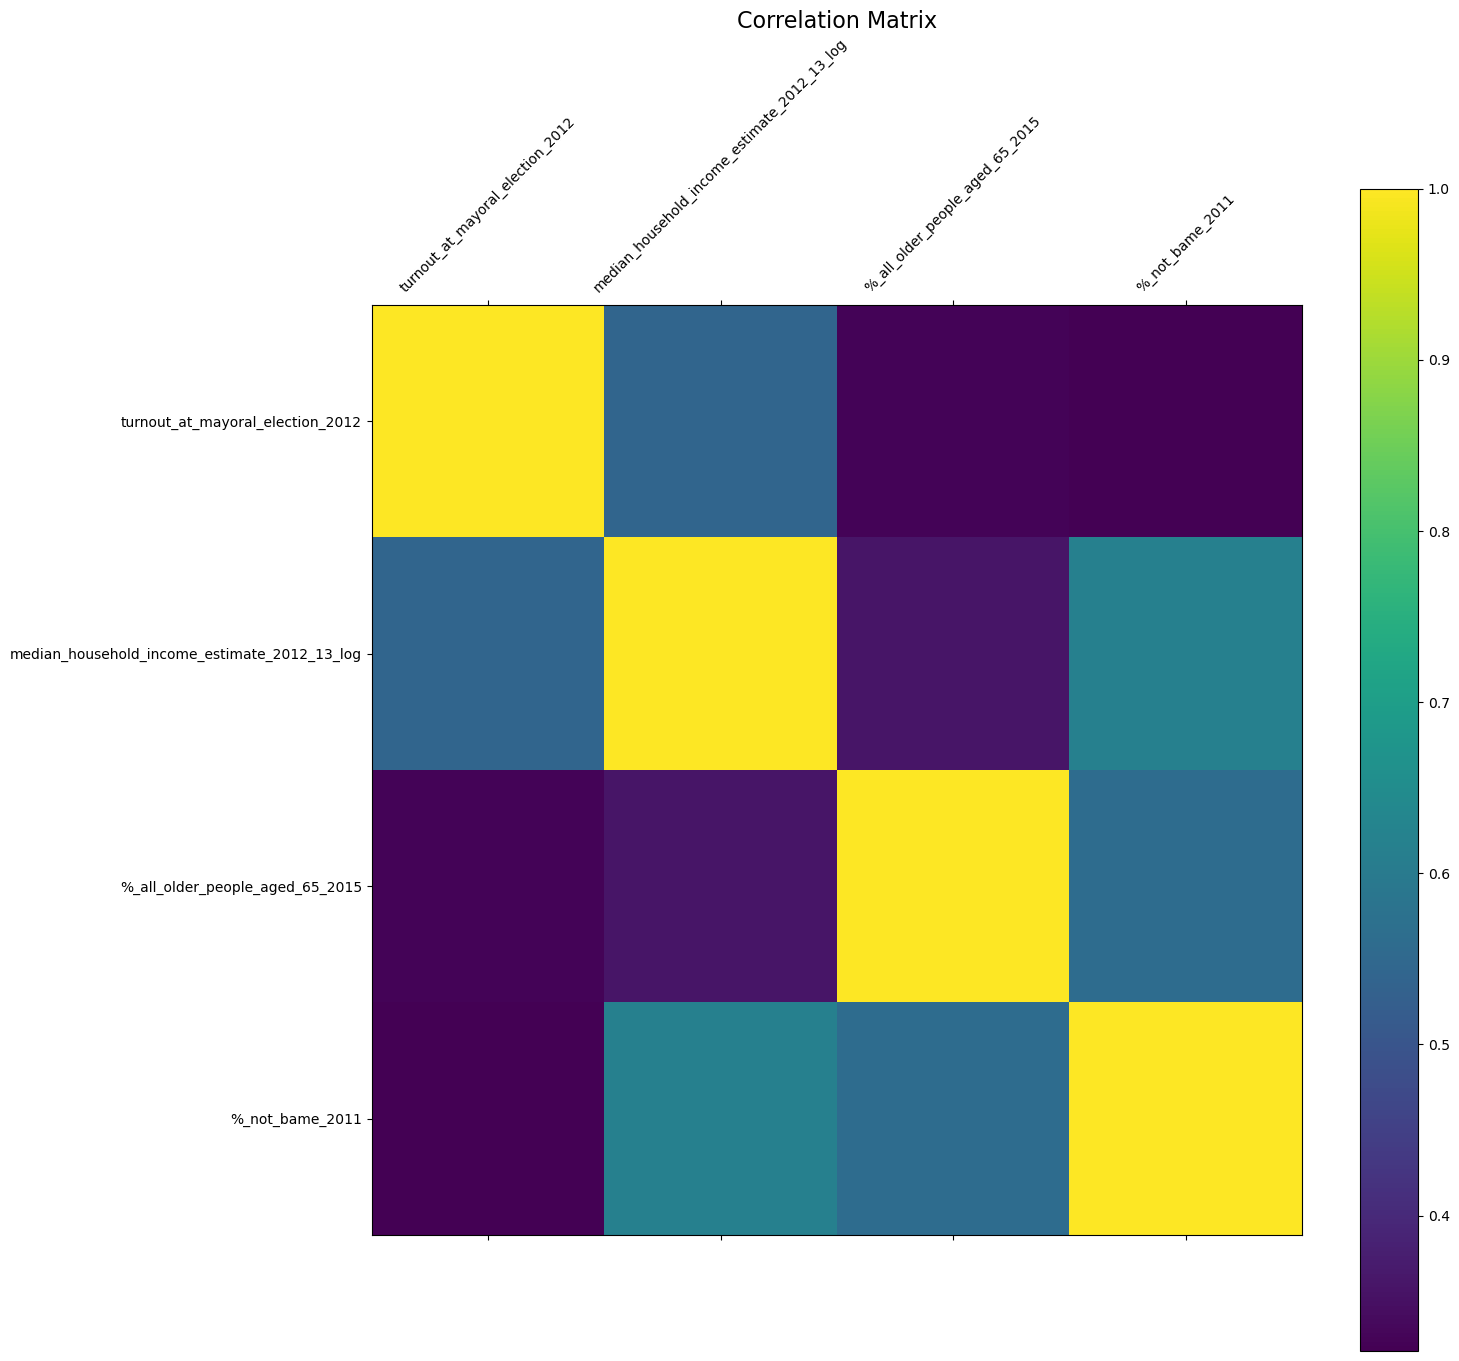

In [26]:
#plotted as a corr matrix
f = plt.figure(figsize=(15, 15))

plt.matshow(df_corr.corr(), fignum=f.number)

plt.xticks(range(df_corr.select_dtypes(['number']).shape[1]), df_corr.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(df_corr.select_dtypes(['number']).shape[1]), df_corr.select_dtypes(['number']).columns, fontsize=10)
#shape[1] is the 4 variables ie 1st row 

cb = plt.colorbar()

cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16)
plt.savefig('output/corrmatrix_multivar.png', dpi=300, transparent=True)

In [27]:
#changing % to pc for relevant variables to get multireg working
df = df.rename(columns= {"%_bame_2011": "pc_bame_2011",
                         "%_all_older_people_aged_65_2015": "pc_all_older_people_aged_65_2015",
                         "%_not_bame_2011": "pc_not_bame_2011"
                        })

running multiregression

In [29]:
model_voter = smf.ols('turnout_at_mayoral_election_2012 ~ median_household_income_estimate_2012_13_log + pc_all_older_people_aged_65_2015 + pc_not_bame_2011', 
                        df).fit()
model_voter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     turnout_at_mayoral_election_2012   R-squared:                       0.322
Model:                                          OLS   Adj. R-squared:                  0.319
Method:                               Least Squares   F-statistic:                     98.25
Date:                              Thu, 08 Dec 2022   Prob (F-statistic):           4.90e-52
Time:                                      11:51:07   Log-Likelihood:                -1808.5
No. Observations:                               624   AIC:                             3625.
Df Residuals:                                   620   BIC:                             3643.
Df Model:                                         3                                         
Covariance Type:                          nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     -140.0164     12.807    -10.933      0.000    -165.166    -114.867
median_household_income_estimate_2012_13_log    16.4228      1.254     13.097      0.000      13.960      18.885
pc_all_older_people_aged_65_2015                 0.2562      0.050      5.125      0.000       0.158       0.354
pc_not_bame_2011                                -0.0377      0.013     -2.819      0.005      -0.064      -0.011
==============================================================================
Omnibus:                       47.956   Durbin-Watson:                   1.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.511
Skew:                          -0.630   Prob(JB):                     2.67e-14
Kurtosis:                       3.904   Cond. No.                     4.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p-value (Prob (F-Statistic)) is less than 0.05. 

**Checking multicollinearity using VIF**

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
        
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

compute_vif(['turnout_at_mayoral_election_2012','median_household_income_estimate_2012_13_log','pc_all_older_people_aged_65_2015', 'pc_not_bame_2011'])

/tmp/ipykernel_296/2831672549.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,turnout_at_mayoral_election_2012,1.475418
1,median_household_income_estimate_2012_13_log,2.061820
2,pc_all_older_people_aged_65_2015,1.522330
3,pc_not_bame_2011,2.079503


VIF for all variables are less than 5, so unlikely to have issue with multicollinearity. Large condition number might then be due to median household income (estimated) needing more standardisation, or could be ignored

For more accurate results, we might use equivalised income to account for household structure etc

# Add DW and JB 

In [32]:
# Durbin Watson Test Statistic
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model_voter.resid)

1.151087596902146

In [33]:
#jb test
from statsmodels.stats.stattools import jarque_bera
jarque_bera(model_voter.resid)

(62.51087410663666,
 2.6664666623982513e-14,
 -0.6298747603670932,
 3.9040439888228793)

### Plotting LINE plots
referenced from: https://emredjan.medium.com/emulating-r-regression-plots-in-python-43741952c034


In [34]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_voter.fittedvalues

# model residuals
model_residuals = model_voter.resid

# normalized residuals
model_norm_residuals = model_voter.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_voter.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_voter.get_influence().cooks_distance[0]

/opt/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


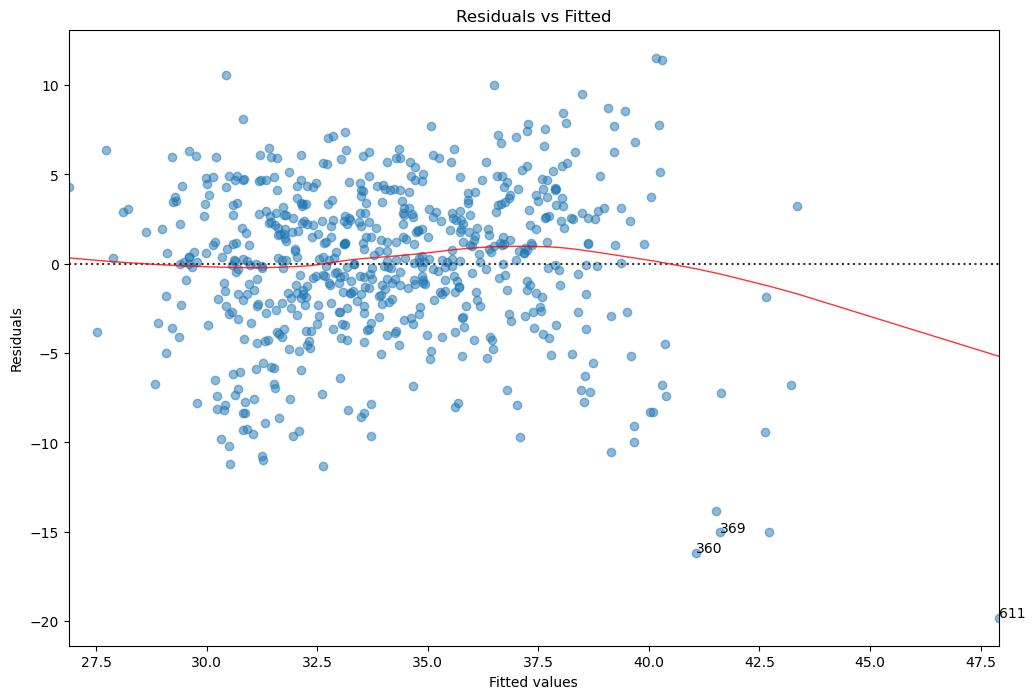

In [35]:
# Residual Plot
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'turnout_at_mayoral_election_2012', data=df_corr, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));
    
plt.savefig('output/LINE_resids_fitted.png', dpi=300, transparent=True)

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


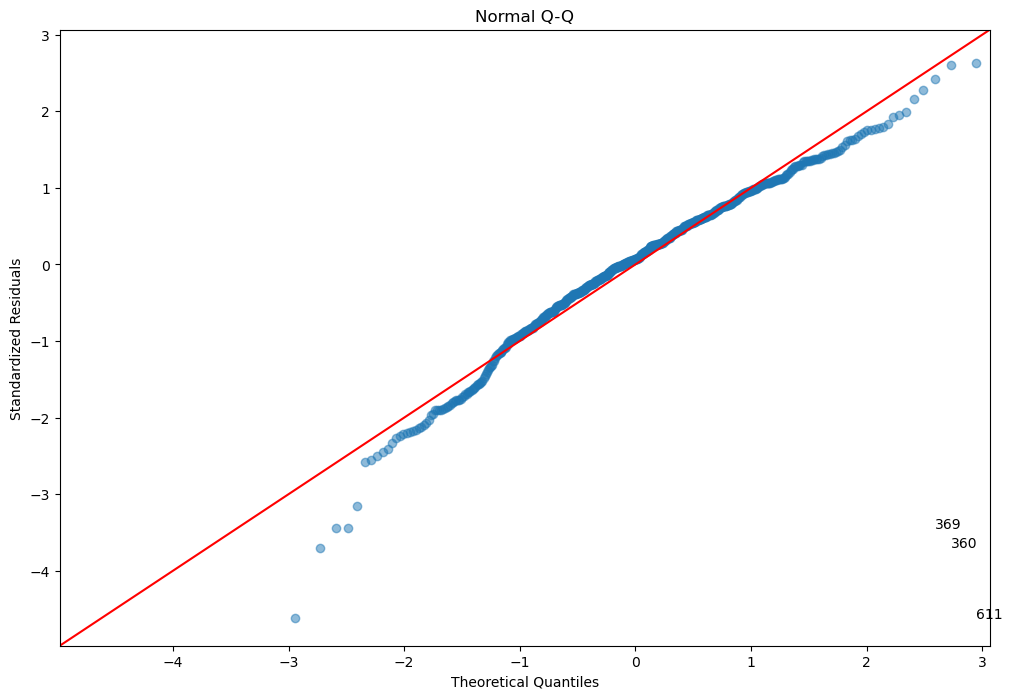

In [36]:
# QQ Plot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
    
plt.savefig('output/LINE_normal_qq.png', dpi=300, transparent=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


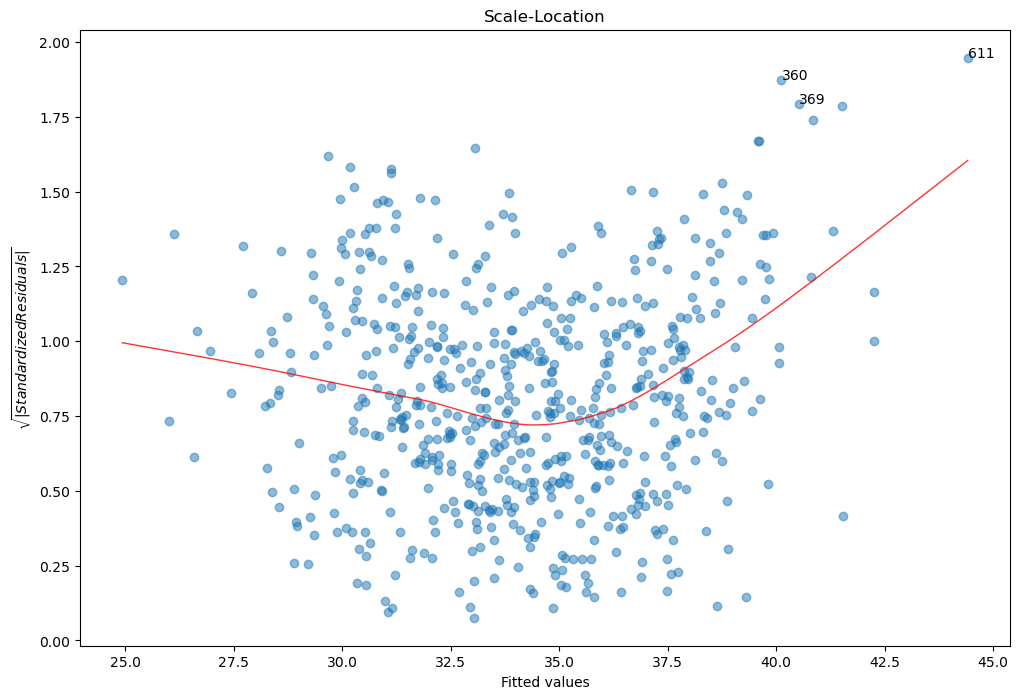

In [31]:
## Scale-Location Plot to assess heteroscedasticity
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));
    
plt.savefig('output/LINE_scale_loc.png', dpi=300, transparent=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


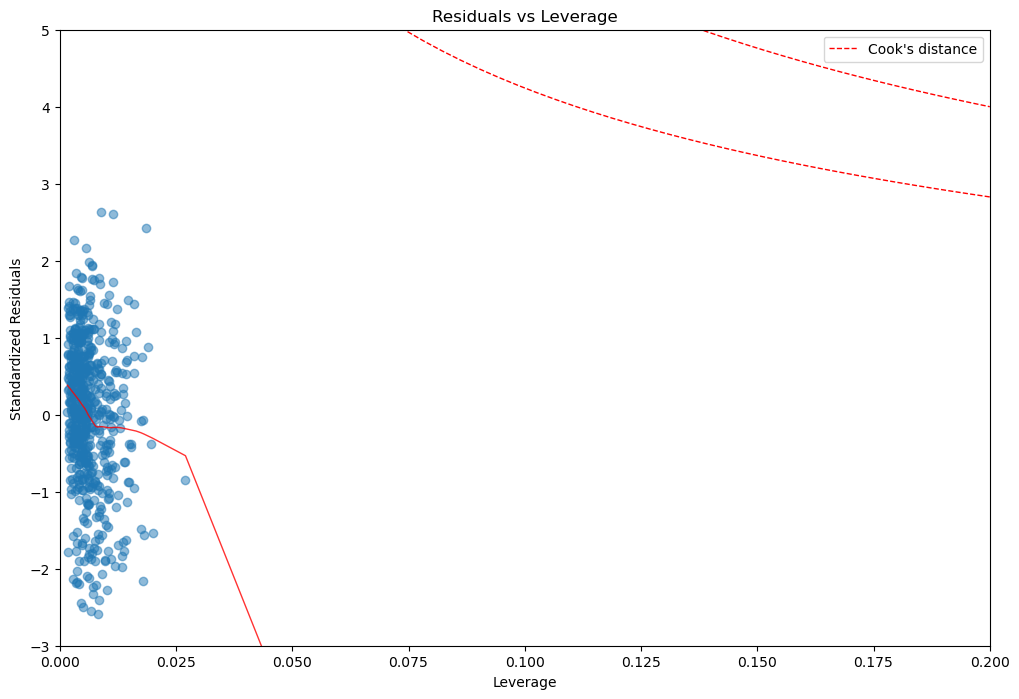

In [37]:
## Leverage plot
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_voter.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

plt.savefig('output/LINE_resids_lev.png', dpi=300, transparent=True)

### Plotting LINE plots WITHOUT OUTLIER


In [50]:
df_corr_no = df_no_outlier[['turnout_at_mayoral_election_2012','median_household_income_estimate_2012_13_log','pc_all_older_people_aged_65_2015', 'pc_not_bame_2011']]

df_corr_no = df_corr_no.rename(columns= {"%_bame_2011": "pc_bame_2011",
                         "%_all_older_people_aged_65_2015": "pc_all_older_people_aged_65_2015",
                         "%_not_bame_2011": "pc_not_bame_2011"
                        })

model_voter_no = smf.ols('turnout_at_mayoral_election_2012 ~ median_household_income_estimate_2012_13_log + pc_all_older_people_aged_65_2015 + pc_not_bame_2011', 
                        df_corr_no).fit()
model_voter_no.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     turnout_at_mayoral_election_2012   R-squared:                       0.344
Model:                                          OLS   Adj. R-squared:                  0.341
Method:                               Least Squares   F-statistic:                     108.3
Date:                              Thu, 08 Dec 2022   Prob (F-statistic):           2.30e-56
Time:                                      11:59:34   Log-Likelihood:                -1795.2
No. Observations:                               623   AIC:                             3598.
Df Residuals:                                   619   BIC:                             3616.
Df Model:                                         3                                         
Covariance Type:                          nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     -153.4845     12.917    -11.882      0.000    -178.851    -128.118
median_household_income_estimate_2012_13_log    17.7408      1.265     14.027      0.000      15.257      20.225
pc_all_older_people_aged_65_2015                 0.2575      0.049      5.237      0.000       0.161       0.354
pc_not_bame_2011                                -0.0447      0.013     -3.382      0.001      -0.071      -0.019
==============================================================================
Omnibus:                       36.854   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.982
Skew:                          -0.574   Prob(JB):                     4.64e-10
Kurtosis:                       3.582   Cond. No.                     4.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_voter_no.fittedvalues

# model residuals
model_residuals = model_voter_no.resid

# normalized residuals
model_norm_residuals = model_voter_no.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_voter_no.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_voter_no.get_influence().cooks_distance[0]

/opt/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


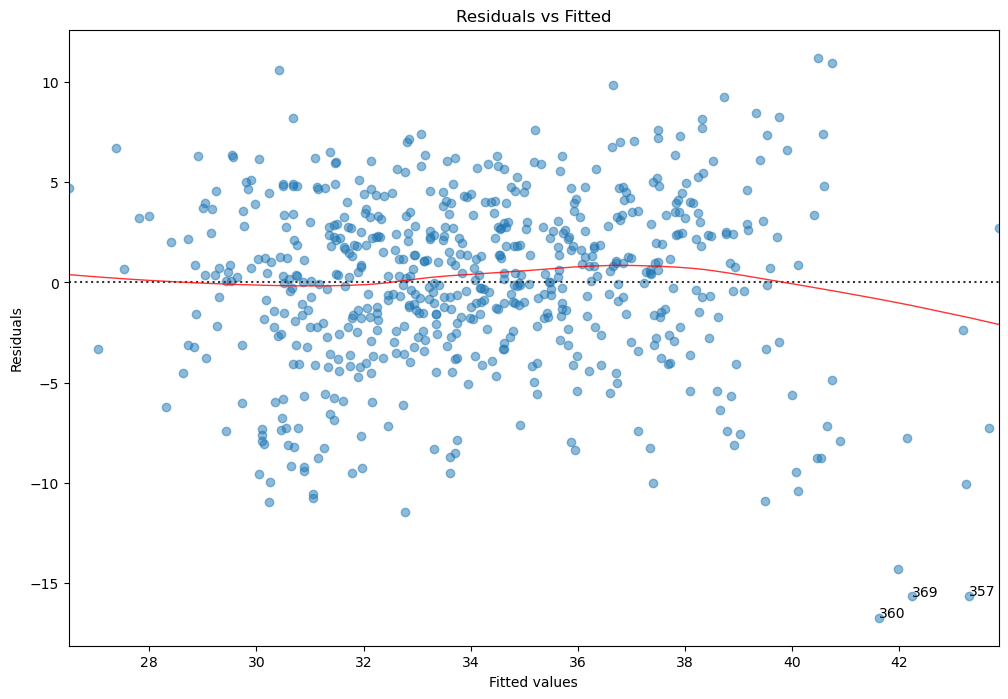

In [57]:
# Residual Plot
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'turnout_at_mayoral_election_2012', data=df_corr_no,
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));


/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


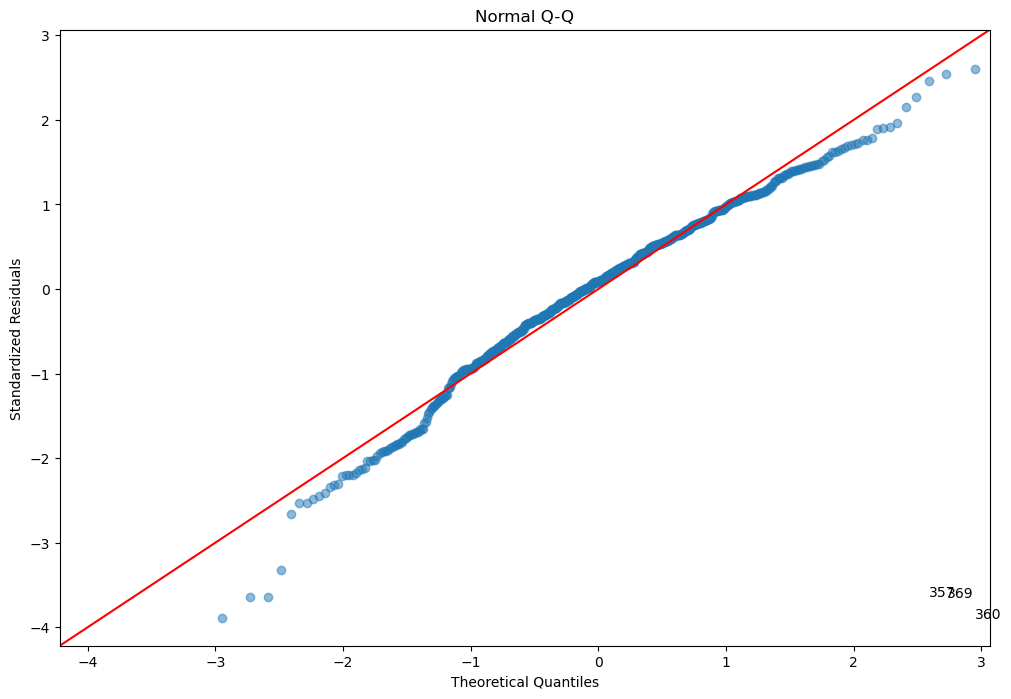

In [58]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
    


/opt/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


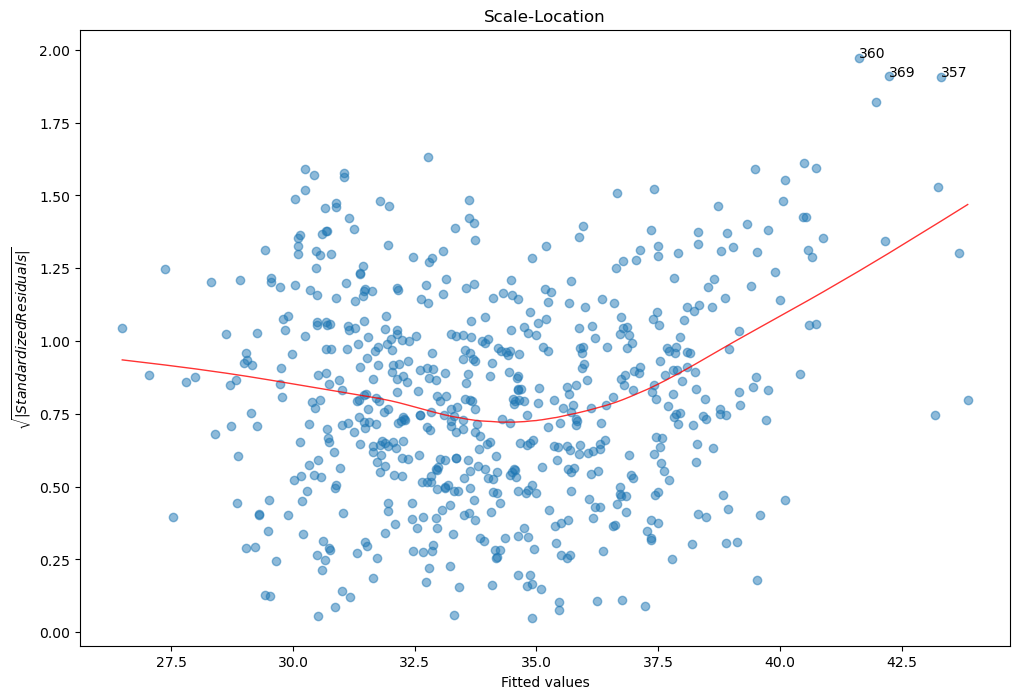

In [59]:
## Scale-Location Plot to assess heteroscedasticity
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

/opt/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


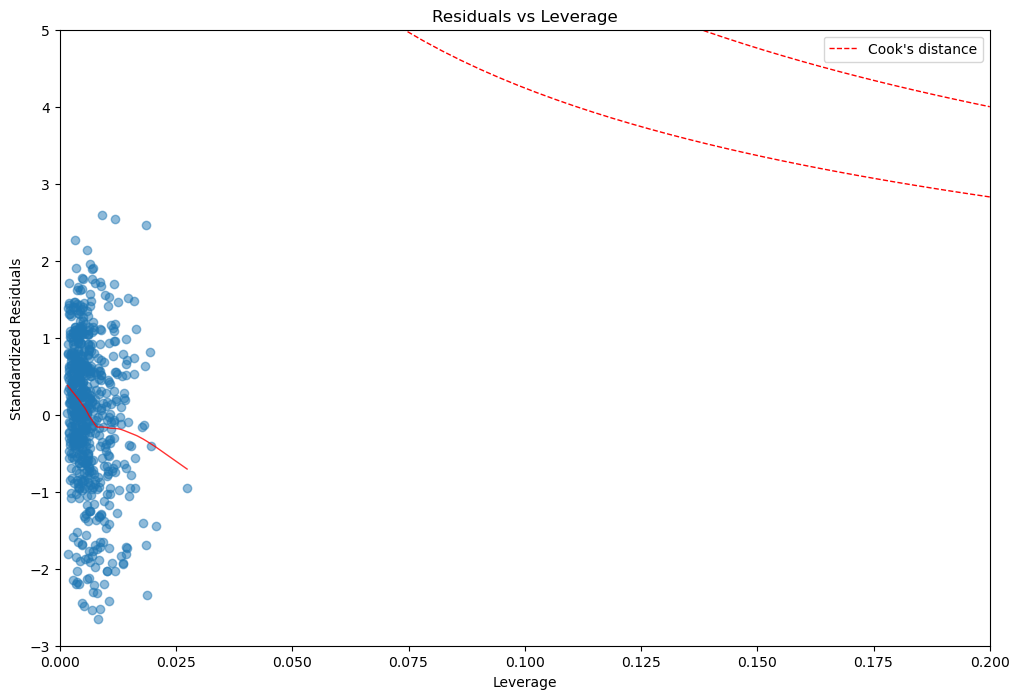

In [60]:
## Leverage plot
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(
    model_leverage,
    model_norm_residuals,
    scatter=False,
    ci=False,
    lowess=True,
    line_kws={"color": "red", "lw": 1, "alpha": 0.8},
)

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title("Residuals vs Leverage")
plot_lm_4.axes[0].set_xlabel("Leverage")
plot_lm_4.axes[0].set_ylabel("Standardized Residuals")

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]))

# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls="--", color="red")


p = len(model_voter.params)  # number of model parameters

graph(
    lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
    np.linspace(0.001, 0.200, 50),
    "Cook's distance",
)  # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, 0.200, 50))  # 1 line
plt.legend(loc="upper right");